# Esercitazione 13
## Wavelets su immagini
#### Sommario
In questa esercitazione si analizza l’utilizzo della trasformata wavelet discreta bidimensionale (DWT2) per l’elaborazione e compressione di immagini digitali.

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
import pywt

#### Esercizio 1

1. Caricare l’immagine `Barbara.png`.

2. Utilizzando il comando `dwt2` della libreria `pywt` effettuare la trasformata wavelet ad un livello. Utilizzare la wavelet di Haar. Visualizzare l’approssimazione e i dettagli ottenuti.

3. Utilizzando il comando `idwt2` verificare che la trasformata wavelet è invertibile. Calcolare l’errore quadratico medio tra l’immagine ricostruita e quella originale per vedere l’ordine di grandezza dell’errore.

4. Provate ora a ricostruire l’immagine utilizzando solo l’approssimazione, cioè ponendo a zero tutti i dettagli, poi mettendo a zero i dettagli obliqui e poi mettendo a zero prima quelli verticali e poi quelli orizzontali. Calcolare l’errore quadratico medio in ognuno dei casi considerati.

5. Comprimere azzerando solo i coefficienti di dettaglio meno espressi: calcolare la media del valore assoluto dei coefficienti di dettaglio ed azzerare i coefficienti il cui valore assoluto è inferiore a tale valore. Calcolare l’errore di ricostruzione in questo caso.

6. Utilizzare il comando `wavedec2` per effettuare la decomposizione del segnale al secondo livello. Utilizzare come wavelet Daubechies 4 (db4). Visualizzare i coefficienti ottenuti.

7. Utilizzando il comando `waverec2` verificare che la trasformata wavelet è invertibile. Calcolare l’errore quadratico medio tra l’immagine ricostruita e quella originale per vedere l’ordine di grandezza dell’errore.

8. Provare ora a comprimere azzerando i coefficienti meno espressi: calcolare la media del valore assoluto dei coefficienti di dettaglio al secondo livello e azzerare i coefficienti di dettaglio (sia del primo che del secondo livello) il cui valore assoluto è inferiore a tale valore. Calcolare l’errore di ricostruzione in questo caso.


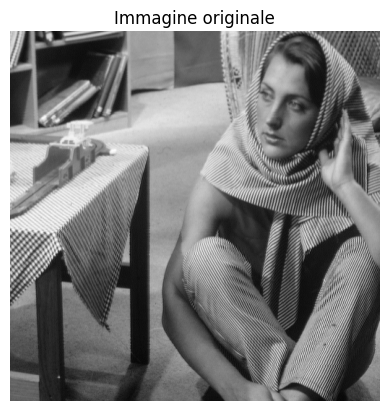

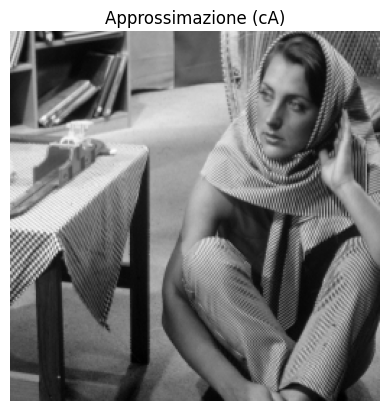

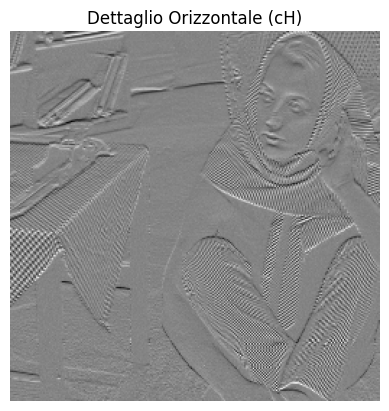

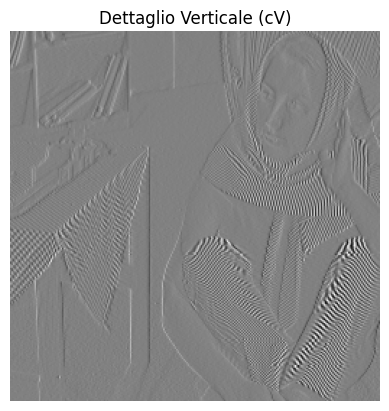

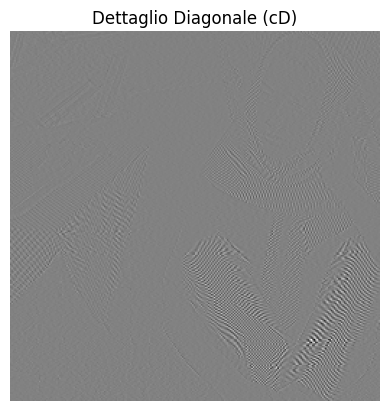

Errore ricostruzione completa (MSE): 2.194309e-32
Solo approssimazione (MSE): 2.873806e-03
Senza dettagli diagonali (MSE): 4.642994e-04
Senza dettagli verticali (MSE): 1.929174e-03
Senza dettagli orizzontali (MSE): 4.803325e-04
Compressione 1° livello (MSE): 9.249098e-05


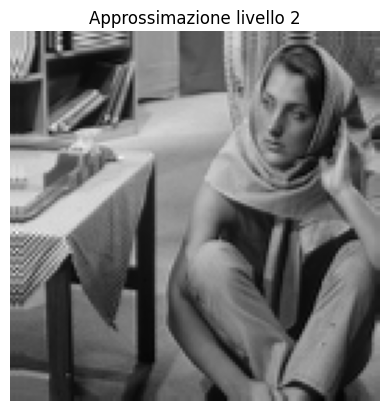

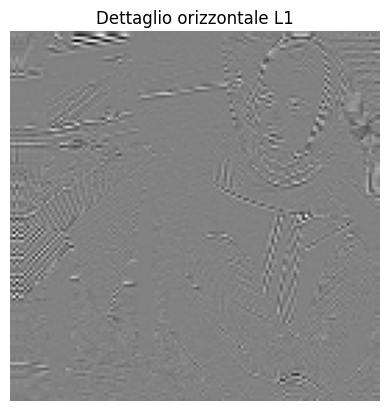

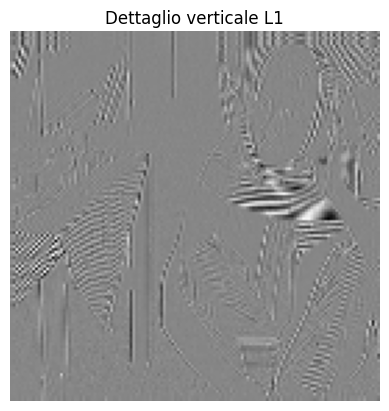

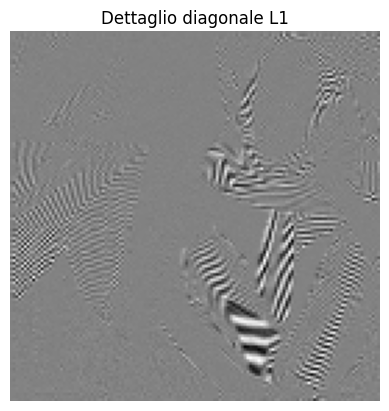

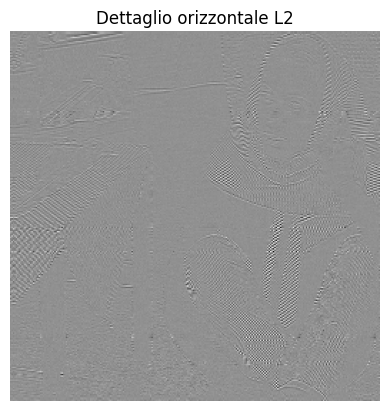

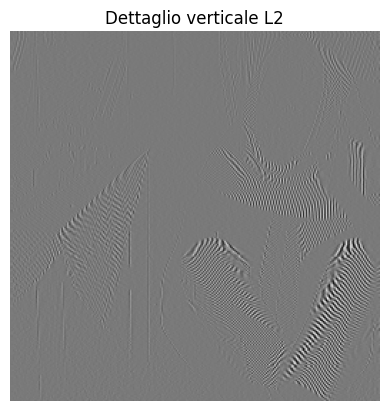

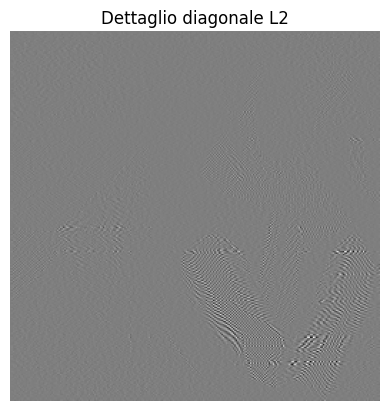

Errore ricostruzione completa L2 (MSE): 3.212038e-32
Compressione 2° livello (MSE): 1.431327e-04


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# ======================================================
# Esercizio 1(1) - Caricamento immagine
# ======================================================
I = np.array(plt.imread('barbara.png'), dtype='float64')

plt.figure()
plt.imshow(I, cmap='gray')
plt.title('Immagine originale')
plt.axis('off')
plt.show()

# ======================================================
# Esercizio 1(2) - DWT2 livello 1 con Haar
# ======================================================
cA, (cH, cV, cD) = pywt.dwt2(I, 'haar')

plt.figure(); plt.imshow(cA, cmap='gray'); plt.title('Approssimazione (cA)'); plt.axis('off')
plt.figure(); plt.imshow(cH, cmap='gray'); plt.title('Dettaglio Orizzontale (cH)'); plt.axis('off')
plt.figure(); plt.imshow(cV, cmap='gray'); plt.title('Dettaglio Verticale (cV)'); plt.axis('off')
plt.figure(); plt.imshow(cD, cmap='gray'); plt.title('Dettaglio Diagonale (cD)'); plt.axis('off')
plt.show()

# ======================================================
# Esercizio 1(3) - Verifica invertibilità
# ======================================================
I_rec = pywt.idwt2((cA, (cH, cV, cD)), 'haar')
mse1 = np.mean((I - I_rec) ** 2)
print(f"Errore ricostruzione completa (MSE): {mse1:.6e}")

# ======================================================
# Esercizio 1(4) - Ricostruzioni parziali
# ======================================================
# Solo approssimazione
I_approx = pywt.idwt2((cA, (np.zeros_like(cH), np.zeros_like(cV), np.zeros_like(cD))), 'haar')
mse2 = np.mean((I - I_approx) ** 2)
print(f"Solo approssimazione (MSE): {mse2:.6e}")

# Zero dettagli diagonali
I_no_diag = pywt.idwt2((cA, (cH, cV, np.zeros_like(cD))), 'haar')
mse3 = np.mean((I - I_no_diag) ** 2)
print(f"Senza dettagli diagonali (MSE): {mse3:.6e}")

# Zero dettagli verticali
I_no_vert = pywt.idwt2((cA, (cH, np.zeros_like(cV), cD)), 'haar')
mse4 = np.mean((I - I_no_vert) ** 2)
print(f"Senza dettagli verticali (MSE): {mse4:.6e}")

# Zero dettagli orizzontali
I_no_horiz = pywt.idwt2((cA, (np.zeros_like(cH), cV, cD)), 'haar')
mse5 = np.mean((I - I_no_horiz) ** 2)
print(f"Senza dettagli orizzontali (MSE): {mse5:.6e}")

# ======================================================
# Esercizio 1(5) - Compressione con soglia media
# ======================================================
threshold = np.mean(np.abs(np.concatenate([cH.flatten(), cV.flatten(), cD.flatten()])))
cH_c = np.where(np.abs(cH) > threshold, cH, 0)
cV_c = np.where(np.abs(cV) > threshold, cV, 0)
cD_c = np.where(np.abs(cD) > threshold, cD, 0)

I_compr = pywt.idwt2((cA, (cH_c, cV_c, cD_c)), 'haar')
mse6 = np.mean((I - I_compr) ** 2)
print(f"Compressione 1° livello (MSE): {mse6:.6e}")

# ======================================================
# Esercizio 1(6) - WAVEDEC2 livello 2 con db4
# ======================================================
coeffs = pywt.wavedec2(I, 'db4', level=2)
cA2 = coeffs[0]

plt.figure(); plt.imshow(cA2, cmap='gray'); plt.title('Approssimazione livello 2'); plt.axis('off')
for level in range(1, len(coeffs)):
    cH_l, cV_l, cD_l = coeffs[level]
    plt.figure(); plt.imshow(cH_l, cmap='gray'); plt.title(f'Dettaglio orizzontale L{level}'); plt.axis('off')
    plt.figure(); plt.imshow(cV_l, cmap='gray'); plt.title(f'Dettaglio verticale L{level}'); plt.axis('off')
    plt.figure(); plt.imshow(cD_l, cmap='gray'); plt.title(f'Dettaglio diagonale L{level}'); plt.axis('off')
plt.show()

# ======================================================
# Esercizio 1(7) - Verifica invertibilità livello 2
# ======================================================
I_rec2 = pywt.waverec2(coeffs, 'db4')
mse7 = np.mean((I - I_rec2) ** 2)
print(f"Errore ricostruzione completa L2 (MSE): {mse7:.6e}")

# ======================================================
# Esercizio 1(8) - Compressione livello 2
# ======================================================
threshold2 = np.mean(np.abs(coeffs[1][0]))  # soglia su dettagli L2
coeffs_compr = [coeffs[0]]  # manteniamo l'approssimazione

for level in range(1, len(coeffs)):
    cH_l, cV_l, cD_l = coeffs[level]
    cH_c = np.where(np.abs(cH_l) > threshold2, cH_l, 0)
    cV_c = np.where(np.abs(cV_l) > threshold2, cV_l, 0)
    cD_c = np.where(np.abs(cD_l) > threshold2, cD_l, 0)
    coeffs_compr.append((cH_c, cV_c, cD_c))

I_compr2 = pywt.waverec2(coeffs_compr, 'db4')
mse8 = np.mean((I - I_compr2) ** 2)
print(f"Compressione 2° livello (MSE): {mse8:.6e}")
